In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
### PyTorch options.
device = torch.device("cpu") # "cpu", "cuda:0".

$$ h_n = \sigma \left(W_1 x + W_2 h_{n-1} + b\right) $$

In [3]:
### Parameters.
size_batch = 1
size_x     = 1
size_h     = 5

x = torch.Tensor(size_batch, size_x, device=device)
h = torch.Tensor(size_batch, size_h, device=device)

w1 = torch.randn(size_x    , size_h, device=device, requires_grad=True)
w2 = torch.randn(size_h    , size_h, device=device, requires_grad=True)
b  = torch.randn(size_batch, size_h, device=device, requires_grad=True)

In [4]:
### Data.
T = torch.linspace(0, 100*3.141592653589793, 1000, device=device)
X1 = T.sin()[:-1]
X2 = X1.roll(5)

batches = torch.Tensor(device=device)
for i in range(len(X1)//size_batch):
    batches = torch.cat((
        batches,
        X1[i*size_batch: (i+1)*size_batch].reshape(1,size_batch,1))
    )

batches_shift = torch.Tensor(device=device)
for i in range(len(X2)//size_batch):
    batches_shift = torch.cat((
        batches_shift,
        X2[i*size_batch: (i+1)*size_batch].reshape(1,size_batch,1))
    )

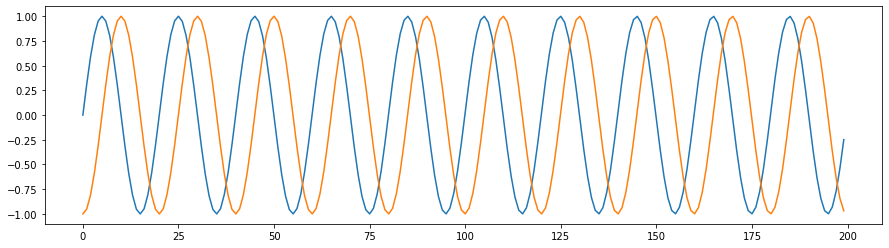

In [5]:
plt.figure(figsize=(15,4))
plt.plot(X1[:200])
plt.plot(X2[:200])

In [ ]:
### Training.
lr     = 1e-1
epochs = 1

output      = torch.Tensor(device=device)
output_loss = torch.Tensor(device=device)

# Main loop.
for _ in range(epochs):
    h.zero_()
    for i, x in enumerate(batches):

        # Forward.
        y = (x.mm(w1) + h.mm(w2) + b).tanh()

        loss = (batches_shift[i][:,0] - y[:,0]).pow(2).sum()

        output      = torch.cat((output     , y[:,0].reshape(size_batch,1).data), 1)
        output_loss = torch.cat((output_loss, loss.reshape(1).data),              0)

        # Backward.
        loss.backward()

        # Update.
        with torch.no_grad():
            w1 -= lr*w1.grad
            w2 -= lr*w2.grad
            b  -= lr*b.grad

            w1.grad.zero_()
            w2.grad.zero_()
            b.grad.zero_()

            # RNN Magic.
            h.data = y

In [ ]:
p = slice(0,150)
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(T[p], X1[p])
plt.plot(T[p], X2[p])
plt.plot(T[p], output.reshape(999)[p])
plt.title("Input, Output")

p = slice(850,999)
plt.subplot(2,2,2)
plt.plot(T[p], X1[p])
plt.plot(T[p], X2[p])
plt.plot(T[p], output.reshape(999)[p])
plt.title("Input, Output")

p = slice(0,150)
plt.subplot(2,2,3)
plt.plot(T[p], (X1*X1*4)[p])
plt.plot(T[p], output_loss[p])
plt.title("Loss")

p = slice(850,999)
plt.subplot(2,2,4)
plt.plot(T[p], (X1*X1*4)[p])
plt.plot(T[p], output_loss[p])
plt.title("Loss")
pass